In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [3]:
# Define the paths to your image folders
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Set the path to the folder containing the 'train' folder
train_path = "/content/gdrive/MyDrive/Colab Notebooks/NeuralNetwork"
data_dir = train_path

# Set the image size
img_size = (32, 32)

# Create empty lists for the images and labels
images = []
labels = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir,'train',str(label))
    print (folder_path)
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print (file_path)
        # Read the image in grayscale mode and resize it
        if file_path.endswith(('.tiff','.bmp')):
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)

            # Append the image and label to the lists
            images.append(img)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)


In [8]:
# Set the path to the folder containing the 'val' folder
val_path = "/content/gdrive/MyDrive/Colab Notebooks/NeuralNetwork"
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)

# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [9]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


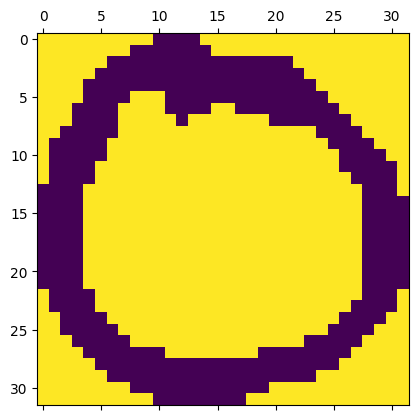

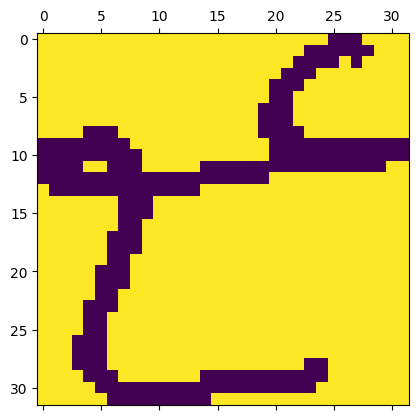

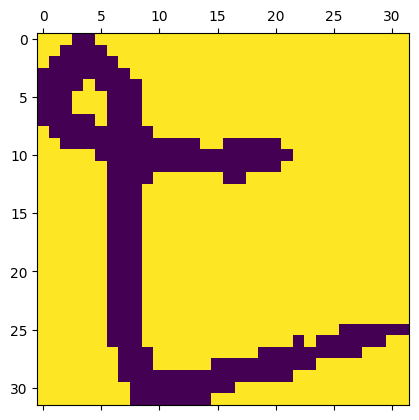

In [10]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [11]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 122.5734 - accuracy: 0.4480 - val_loss: 36.6689 - val_accuracy: 0.6910
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 26.5554 - accuracy: 0.8020 - val_loss: 41.8867 - val_accuracy: 0.7360
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 15.1579 - accuracy: 0.8670 - val_loss: 25.1123 - val_accuracy: 0.8146
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 9.0549 - accuracy: 0.9080 - val_loss: 13.6362 - val_accuracy: 0.8596
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 4.3012 - accuracy: 0.9450 - val_loss: 15.6914 - val_accuracy: 0.8708
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 4.6206 - accuracy: 0.9440 - val_loss: 20.4882 - val_accuracy: 0.8146
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 6.2327 - accuracy: 0.9390 - val_loss: 13.5697 - val_accuracy: 0.8820
Epoch 8/1

In [16]:
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.8241 - accuracy: 0.9270


[0.8241271376609802, 0.9269663095474243]

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


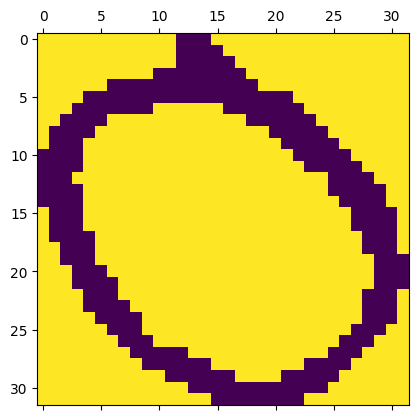

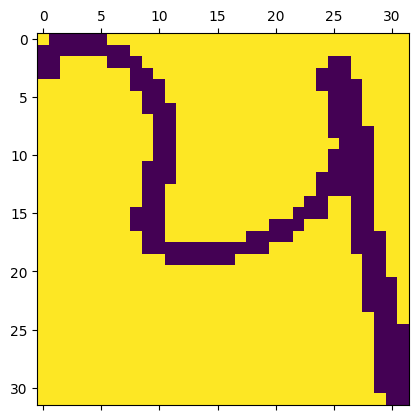

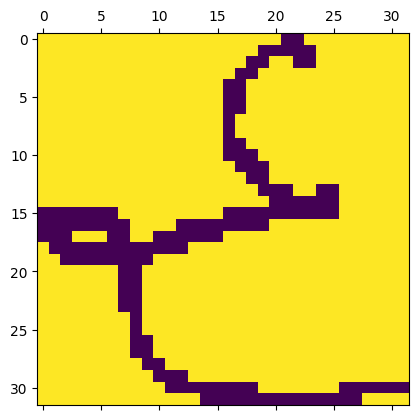

In [17]:
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [12]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7309 - accuracy: 0.9360 - val_loss: 0.9568 - val_accuracy: 0.7865
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.9230 - val_loss: 0.9222 - val_accuracy: 0.8483
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.9550 - val_loss: 0.8941 - val_accuracy: 0.8820
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.9780 - val_loss: 0.8734 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.9860 - val_loss: 0.8602 - val_accuracy: 0.9326
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.9950 - val_loss: 0.8496 - val_accuracy: 0.9326
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.9950 - val_loss: 0.8419 - val_accuracy: 0.9326
Epoch 8/10
32/32 [==

In [13]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.9270


[0.8241271376609802, 0.9269663095474243]

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


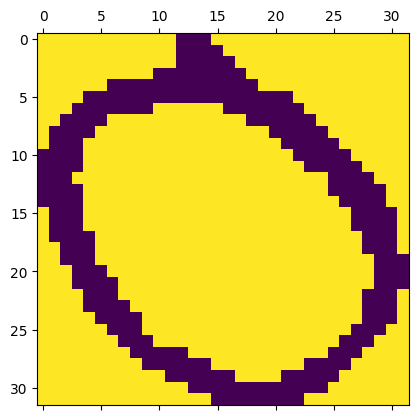

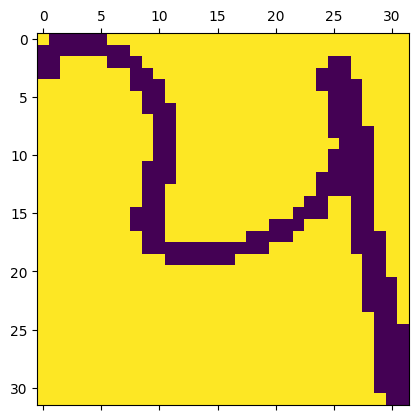

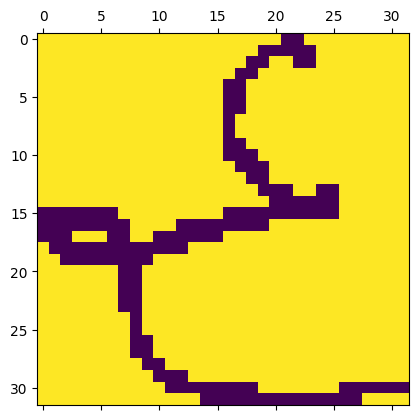

In [14]:
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [15]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 5, 4, 2, 5, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0, 12,  1,  1,  2,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

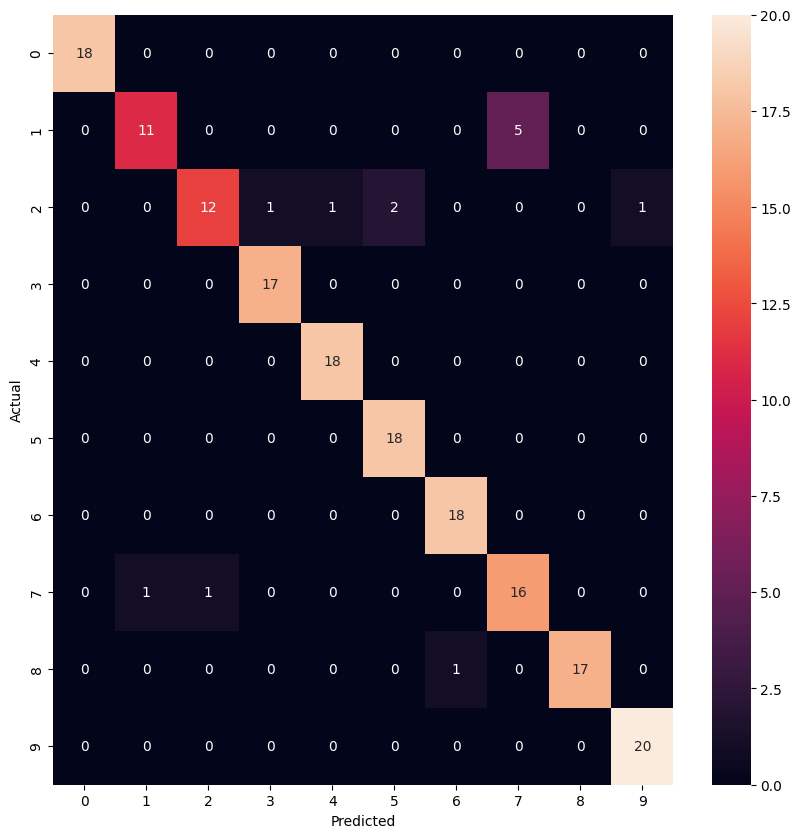

In [18]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
keras.layers.Dense(10, activation='softmax')
])
# compile the nn
model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 17ms/step - loss: 1.4635 - accuracy: 0.6290 - val_loss: 0.4688 - val_accuracy: 0.8596
Epoch 2/10
32/32 [==============================] - 0s 11ms/step - loss: 0.1891 - accuracy: 0.9400 - val_loss: 0.3055 - val_accuracy: 0.8933
Epoch 3/10
32/32 [==============================] - 0s 11ms/step - loss: 0.1096 - accuracy: 0.9670 - val_loss: 0.2887 - val_accuracy: 0.8876
Epoch 4/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0926 - accuracy: 0.9710 - val_loss: 0.2275 - val_accuracy: 0.9551
Epoch 5/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0521 - accuracy: 0.9900 - val_loss: 0.2509 - val_accuracy: 0.9270
Epoch 6/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0463 - accuracy: 0.9890 - val_loss: 0.1877 - val_accuracy: 0.9551
Epoch 7/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0368 - accuracy: 0.9900 - val_loss: 0.2218 - val_accuracy: 0.9382
Epoch 8/10
32

In [20]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9494


[0.20006845891475677, 0.949438214302063]

In [21]:
# Earlier we got 0.9213483333587646 now we got 0.9606741666793823 accuracy

# redo the confusion matrix
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 3ms/step
[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 5, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

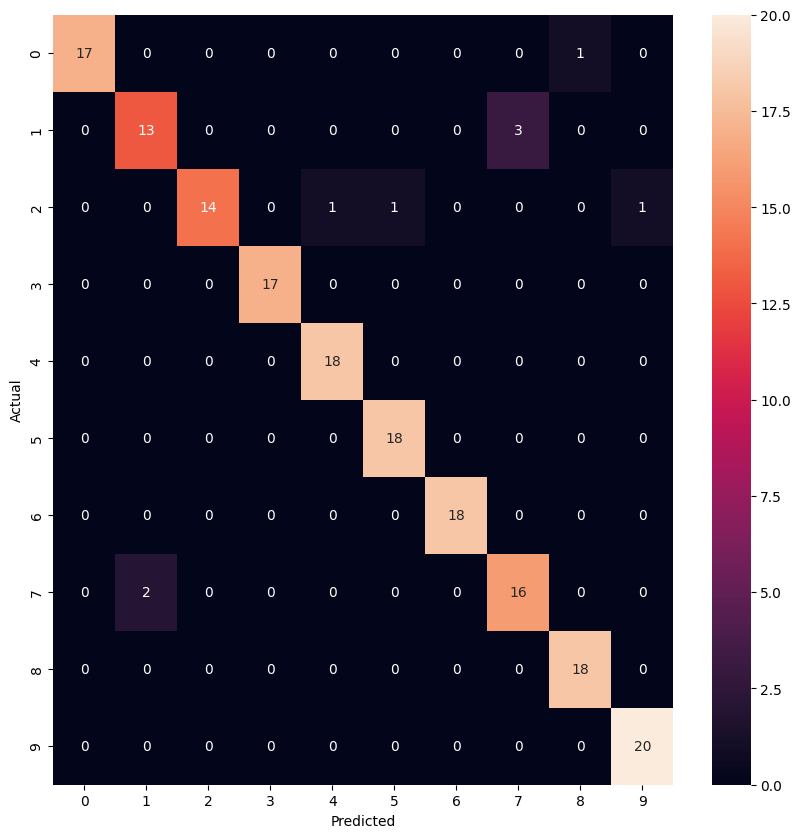

In [22]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 2ms/step - loss: 13.6782 - accuracy: 0.9270
Test accuracy: 0.9269663095474243


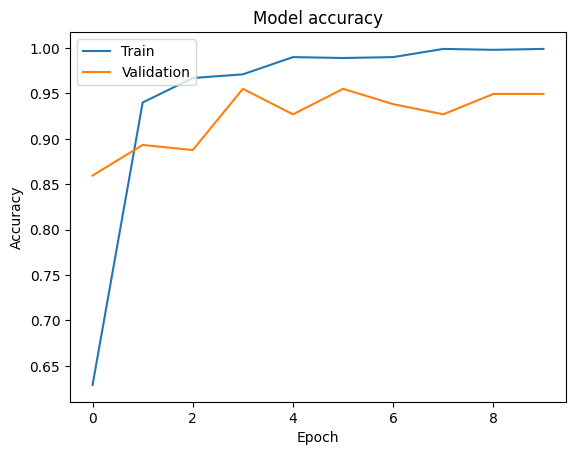

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()